# Import Librairies

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1 - Preprocessing


In [204]:
titanic = pd.read_csv("data/titanic-passengers.csv", encoding="ISO8859-1", sep=";") #load our dataset
df=titanic.copy() #copy
df #view head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [205]:
df.head() #view head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [207]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [208]:
print("Age")
print("mean:",df["Age"].mean())
print("mode:", df["Age"].mode())
print("median:", df["Age"].median())

Age
mean: 29.69911764705882
mode: 0    24.0
dtype: float64
median: 28.0


In [209]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [211]:
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [212]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [213]:
DicSex ={"female":0,"male":1}
df["Sex"].replace(DicSex, inplace=True)

In [214]:
DicSurvived ={"Yes":1,"No":0}
df["Survived"].replace(DicSurvived, inplace=True)

In [215]:
DicEmbarked ={"S":1,"C":2,"Q":3}
df["Embarked"].replace(DicEmbarked, inplace=True)

In [216]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,B96 B98,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,B96 B98,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,B96 B98,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,1


In [217]:
df["Embarked"].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

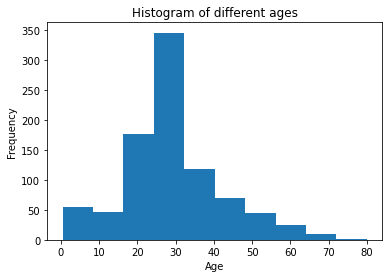

In [218]:
plt.title("Histogram of different ages")
plt.xlabel("Age")
df["Age"].plot.hist()

<AxesSubplot:xlabel='Sex', ylabel='Sex value'>

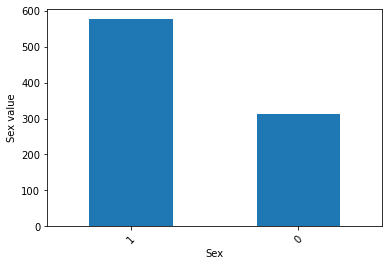

In [219]:
plt.xlabel("Sex")
plt.ylabel("Sex value")
vc= df["Sex"].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:xlabel='Survived(Yes=0, No=1)', ylabel='Survived value'>

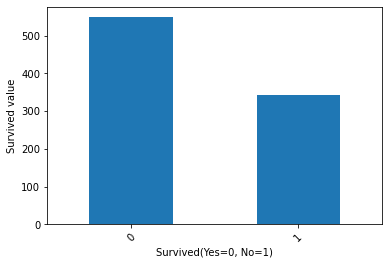

In [220]:
plt.xlabel("Survived(Yes=0, No=1)")
plt.ylabel("Survived value")
vc= df["Survived"].value_counts()
vc.plot.bar(rot=45)

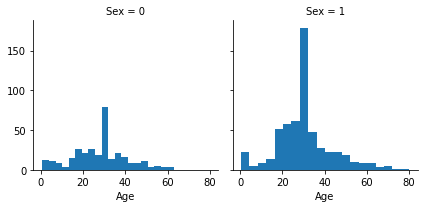

In [221]:
g=sns.FacetGrid(df,col="Sex")
g.map(plt.hist,"Age", bins=20)
#correlation entre sex et age

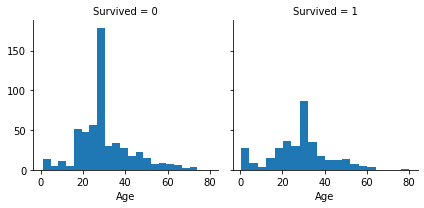

In [222]:
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"Age", bins=20)

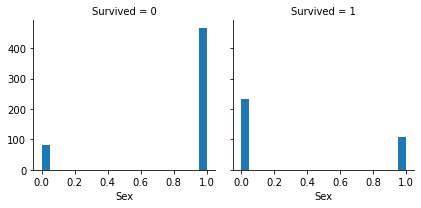

In [223]:
g=sns.FacetGrid(df,col="Survived")
g.map(plt.hist,"Sex", bins=20)

In [224]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

In [225]:
df.drop(['Name'], axis = 1, inplace= True)


In [226]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,1,28.0,0,0,248740,13.0000,B96 B98,1
1,76,0,3,1,25.0,0,0,348123,7.6500,F G73,1
2,641,0,3,1,20.0,0,0,350050,7.8542,B96 B98,1
3,568,0,3,0,29.0,0,4,349909,21.0750,B96 B98,1
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,B71,1


In [227]:
name = titanic['Name']
titre = []
for i in name:
    a = i.split(".")
    b = a[0].split(",")
    c = b[1].split(" ")
    titre.append(c[1])
df = df.assign(Title = titre)

In [228]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,1,28.0,0,0,248740,13.0000,B96 B98,1,Mr
1,76,0,3,1,25.0,0,0,348123,7.6500,F G73,1,Mr
2,641,0,3,1,20.0,0,0,350050,7.8542,B96 B98,1,Mr
3,568,0,3,0,29.0,0,4,349909,21.0750,B96 B98,1,Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,B71,1,Mr


In [229]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Lady          1
Jonkheer      1
Mme           1
Sir           1
Capt          1
the           1
Ms            1
Name: Title, dtype: int64

In [230]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [231]:
df['Title'].replace(Title_Dictionary, inplace=True)
df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      4
the          1
Name: Title, dtype: int64

In [232]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


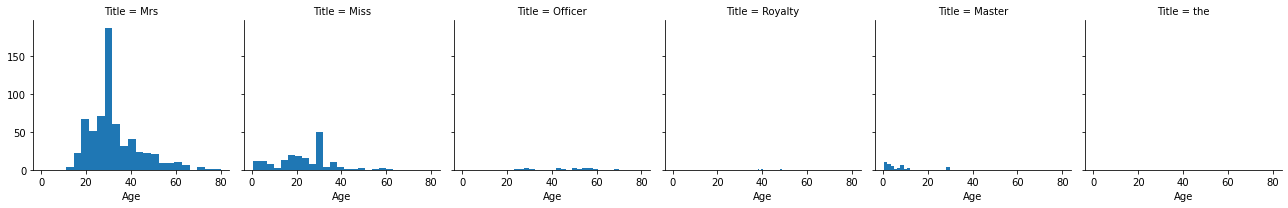

In [233]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,"Age", bins=20)

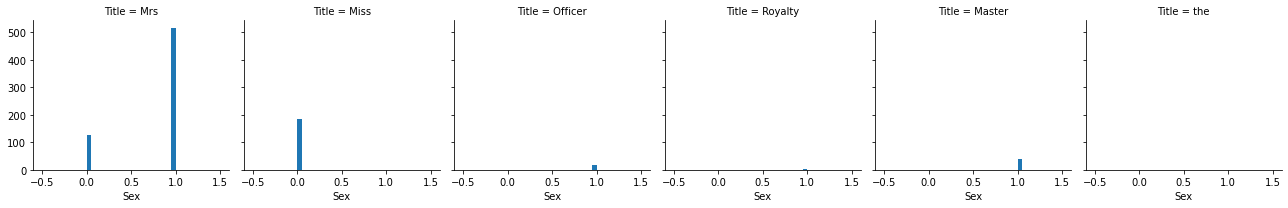

In [234]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,"Sex", bins=20)

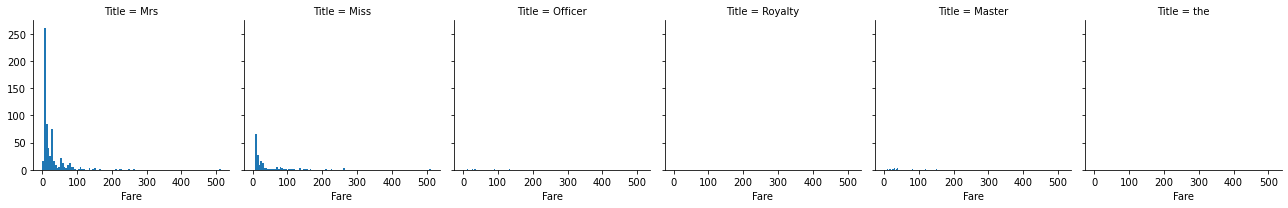

In [235]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,"Fare", bins=100)

In [236]:
df["FamilySize"] = df[["SibSp", "Parch"]].sum(axis=1)
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,1,28.000000,0,0,248740,13.0000,B96 B98,1,Mrs,0
1,76,0,3,1,25.000000,0,0,348123,7.6500,F G73,1,Mrs,0
2,641,0,3,1,20.000000,0,0,350050,7.8542,B96 B98,1,Mrs,0
3,568,0,3,0,29.000000,0,4,349909,21.0750,B96 B98,1,Mrs,4
4,672,0,1,1,31.000000,1,0,F.C. 12750,52.0000,B71,1,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.000000,1,0,237736,30.0708,B96 B98,2,Mrs,1
887,61,0,3,1,22.000000,0,0,2669,7.2292,B96 B98,2,Mrs,0
888,535,0,3,0,30.000000,0,0,315084,8.6625,B96 B98,1,Miss,0
889,102,0,3,1,29.699118,0,0,349215,7.8958,B96 B98,1,Mrs,0


In [237]:
df = df.drop(['Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,1,28.0,0,0,13.0000,B96 B98,1,Mrs,0
1,76,0,3,1,25.0,0,0,7.6500,F G73,1,Mrs,0
2,641,0,3,1,20.0,0,0,7.8542,B96 B98,1,Mrs,0
3,568,0,3,0,29.0,0,4,21.0750,B96 B98,1,Mrs,4
4,672,0,1,1,31.0,1,0,52.0000,B71,1,Mrs,1


In [238]:
df = df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,343,0,2,1,28.0,0,0,13.0000,1,Mrs,0
1,76,0,3,1,25.0,0,0,7.6500,1,Mrs,0
2,641,0,3,1,20.0,0,0,7.8542,1,Mrs,0
3,568,0,3,0,29.0,0,4,21.0750,1,Mrs,4
4,672,0,1,1,31.0,1,0,52.0000,1,Mrs,1


In [239]:
data = [df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [240]:
data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    # extract titles
   # dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    df.head()

In [249]:
x = df.drop("Survived", axis=1)
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))



Accuracy=0.83


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
